In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# lets load the MNIST dataset from Kaggle
datasource: https://www.kaggle.com/c/digit-recognizer/data

In [3]:

mnist = pd.read_csv("train.csv")
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
x = mnist.drop("label", axis = 1)
x.shape

(42000, 784)

In [6]:
y = mnist[["label"]]
y.shape

(42000, 1)

label    0
Name: 1, dtype: int64


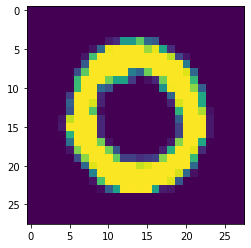

In [14]:
plt.imshow(x.iloc[1].values.reshape(28,28))
print(y.iloc[1])

In [12]:
print(y.iloc[1])

label    0
Name: 1, dtype: int64


In [15]:
# defining function to plot image
def plot_image(image):
    image_1 = image.values.reshape(28,28)
    plt.imshow(image_1)
    plt.axis("off")
    

label    1
Name: 2, dtype: int64


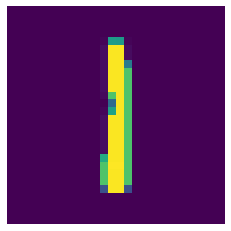

In [17]:
plot_image(x.iloc[2])
print(y.iloc[2])

# Training and testing data


In [26]:
# startified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 29)
for train_idx, test_idx in split.split(mnist,mnist["label"]):
    strat_train_set = mnist.loc[train_idx]
    strat_test_set = mnist.loc[test_idx]
    

In [27]:
strat_train_set.shape

(33600, 785)

In [28]:
strat_test_set.shape

(8400, 785)

In [29]:
mnist.shape

(42000, 785)

In [30]:
mnist["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [31]:
# praportion of class 5 in mnist data set
(3795/42000)*100


9.035714285714286

In [33]:
strat_train_set["label"].value_counts()

1    3747
7    3521
3    3481
9    3350
2    3342
6    3309
0    3306
4    3258
8    3250
5    3036
Name: label, dtype: int64

In [34]:
# proportion of class 5 in strat_train_set
(3036/33600)*100


9.035714285714286

In [39]:
# random sampling 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 29)


In [40]:
x_train.shape

(33600, 784)

In [41]:
y_train.shape

(33600, 1)

In [42]:
x_test.shape

(8400, 784)

In [43]:
y_test.shape

(8400, 1)

# Binary classfier

In [44]:
# lets build 5-detector classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [45]:
y_train_5

,label
15126,False
12188,False
14539,False
2026,False
12384,False
...,...
33576,False
10749,False
39148,False
32115,False


In [47]:
# lets bulid stochastic gradient descent classifer
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()

In [48]:
classifier.fit(x_train,y_train_5)

C:\Users\davat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

label    8
Name: 20, dtype: int64


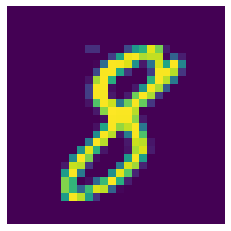

In [50]:
# lets take some random image
random_image = x.iloc[20]
plot_image(random_image)
print(y.iloc[20])

In [52]:
# lets predict from our model
classifier.predict([random_image])

array([False])

# Cross validation

In [55]:
from sklearn.model_selection import cross_val_score,cross_val_predict
cross_val_score(classifier,x_train,y_train_5, cv = 3, scoring = "accuracy")


C:\Users\davat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\davat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\davat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.96303571, 0.90669643, 0.96901786])

# Model evaluation

In [59]:
from sklearn.metrics import confusion_matrix,classification_report
y_test_prediction = cross_val_predict(classifier, x_test, y_test_5, cv = 3)
print(confusion_matrix(y_test_5, y_test_prediction))

C:\Users\davat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\davat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\davat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[7312  323]
 [ 153  612]]


In [60]:
print(classification_report(y_test_5,y_test_prediction))

              precision    recall  f1-score   support

       False       0.98      0.96      0.97      7635
        True       0.65      0.80      0.72       765

    accuracy                           0.94      8400
   macro avg       0.82      0.88      0.84      8400
weighted avg       0.95      0.94      0.95      8400



In [64]:
from sklearn.metrics import precision_score, recall_score,f1_score
precision_score(y_test_5,y_test_prediction)

0.6545454545454545

In [62]:
recall_score(y_test_5,y_test_prediction)

0.8

In [65]:
f1_score(y_test_5,y_test_prediction)

0.7200000000000001